<a href="https://colab.research.google.com/github/makamnilisha/deep-learning/blob/master/DATA240_Assignment2_Nilisha_Makam_Prashantha_015999906.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cell_data = pd.read_csv('/content/gdrive/MyDrive/Assignment2-1/data2.csv')

In [4]:
cell_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Split the features into test and train data

In [6]:
X = cell_data.drop(['diagnosis'],axis=1)
y = cell_data[['diagnosis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("There are {} Training Data".format(X_train.shape[0]))
#print("There are {} Validation Data".format(X_valid.shape[0]))
print("There are {} Testing Data".format(X_test.shape[0]))

There are 398 Training Data
There are 171 Testing Data


# Decision Tree
# 1. Use “from sklearn.tree import DecisionTreeClassifier”.
## a) Train a DT classifier with Entropy (C1) and GINI (C2) and compare the performance.

In [7]:
GLOBAL_RANDOM_STATE = 0

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

c1_tree = DecisionTreeClassifier(random_state=GLOBAL_RANDOM_STATE, criterion='entropy').fit(X_train, y_train.values.ravel())

y_pred_c1_entropy = c1_tree.predict(X_test)

print("Results of decision tree classifier(entropy) \n ")
print("Confusion Matrix:\n ",
confusion_matrix(y_test, y_pred_c1_entropy))

print ("Accuracy : ",
accuracy_score(y_test,y_pred_c1_entropy)*100)

print("Report : ",
classification_report(y_test, y_pred_c1_entropy))

Results of decision tree classifier(entropy) 
 
Confusion Matrix:
  [[106   2]
 [  5  58]]
Accuracy :  95.90643274853801
Report :                precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [9]:
from sklearn.tree import DecisionTreeClassifier
c2_tree = DecisionTreeClassifier(random_state=GLOBAL_RANDOM_STATE, criterion='gini').fit(X_train, y_train.values.ravel())

y_pred_c2_gini = c2_tree.predict(X_test)
print("Results of decision tree classifier(gini): ")
print("Confusion Matrix:\n ",
confusion_matrix(y_test, y_pred_c2_gini))

print ("Accuracy : ",
accuracy_score(y_test,y_pred_c2_gini)*100)

print("Report :\n ",
classification_report(y_test, y_pred_c2_gini))

Results of decision tree classifier(gini): 
Confusion Matrix:
  [[98 10]
 [ 3 60]]
Accuracy :  92.39766081871345
Report :
                precision    recall  f1-score   support

           B       0.97      0.91      0.94       108
           M       0.86      0.95      0.90        63

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



The above results show that model using Entropy overall outperforms the model using Gini Criterion.
Entropy has higher Accuracy at 95.90 and better recall.
F1 score is similar for both classes.
However Gini has higher recall for class M (Malignant) suggesting that it captures more malignant cases, but has lower precision for that class.

The choice between the two models may depend on the specific goals and requirements of your application.

## b) Visualize the C1 and C2 by using the “graphviz” library

In [10]:
import graphviz
from sklearn import tree
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

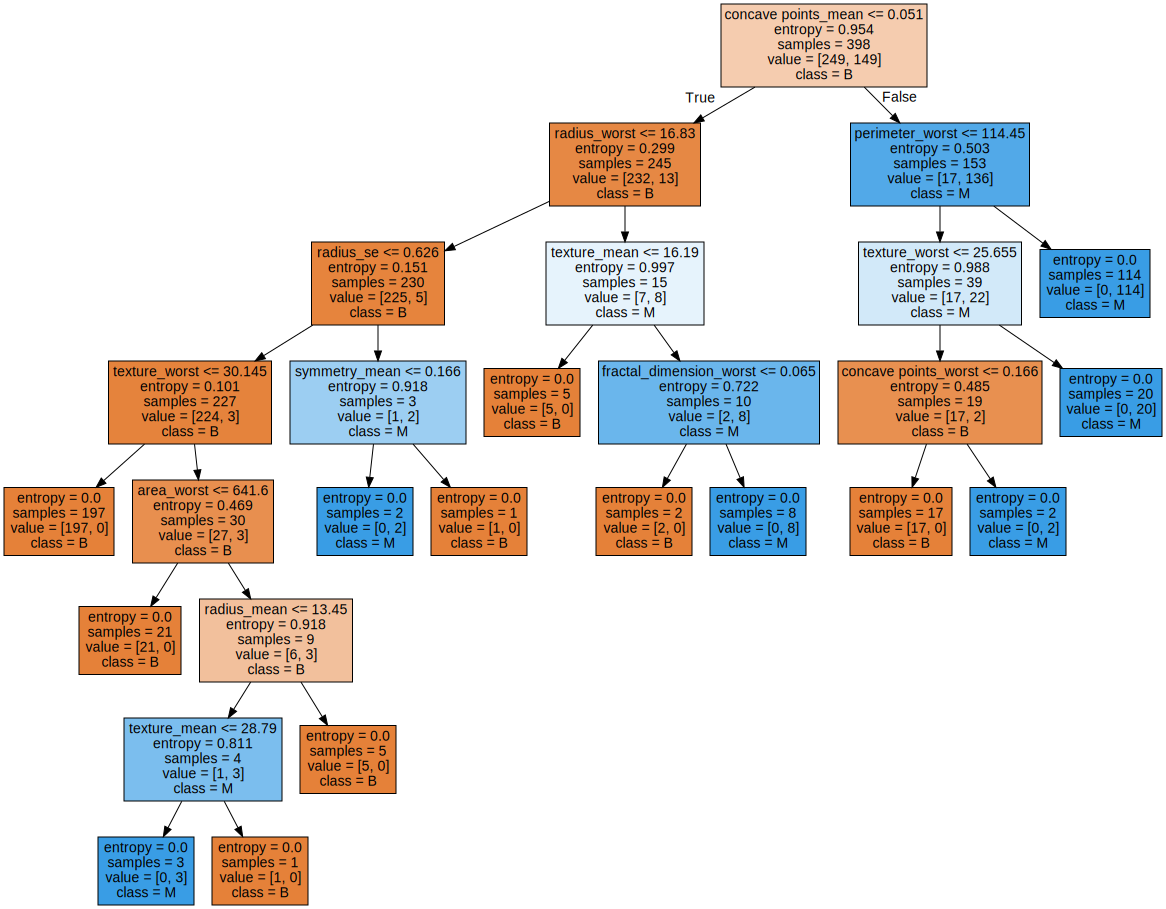

In [11]:
# c1 decision tree
c1_dot_data = tree.export_graphviz(c1_tree, out_file=None,
                                feature_names=X.columns,
                                class_names=['B', 'M'],
                                filled=True)

# Draw graph
graph = graphviz.Source(c1_dot_data, format="png")
graph

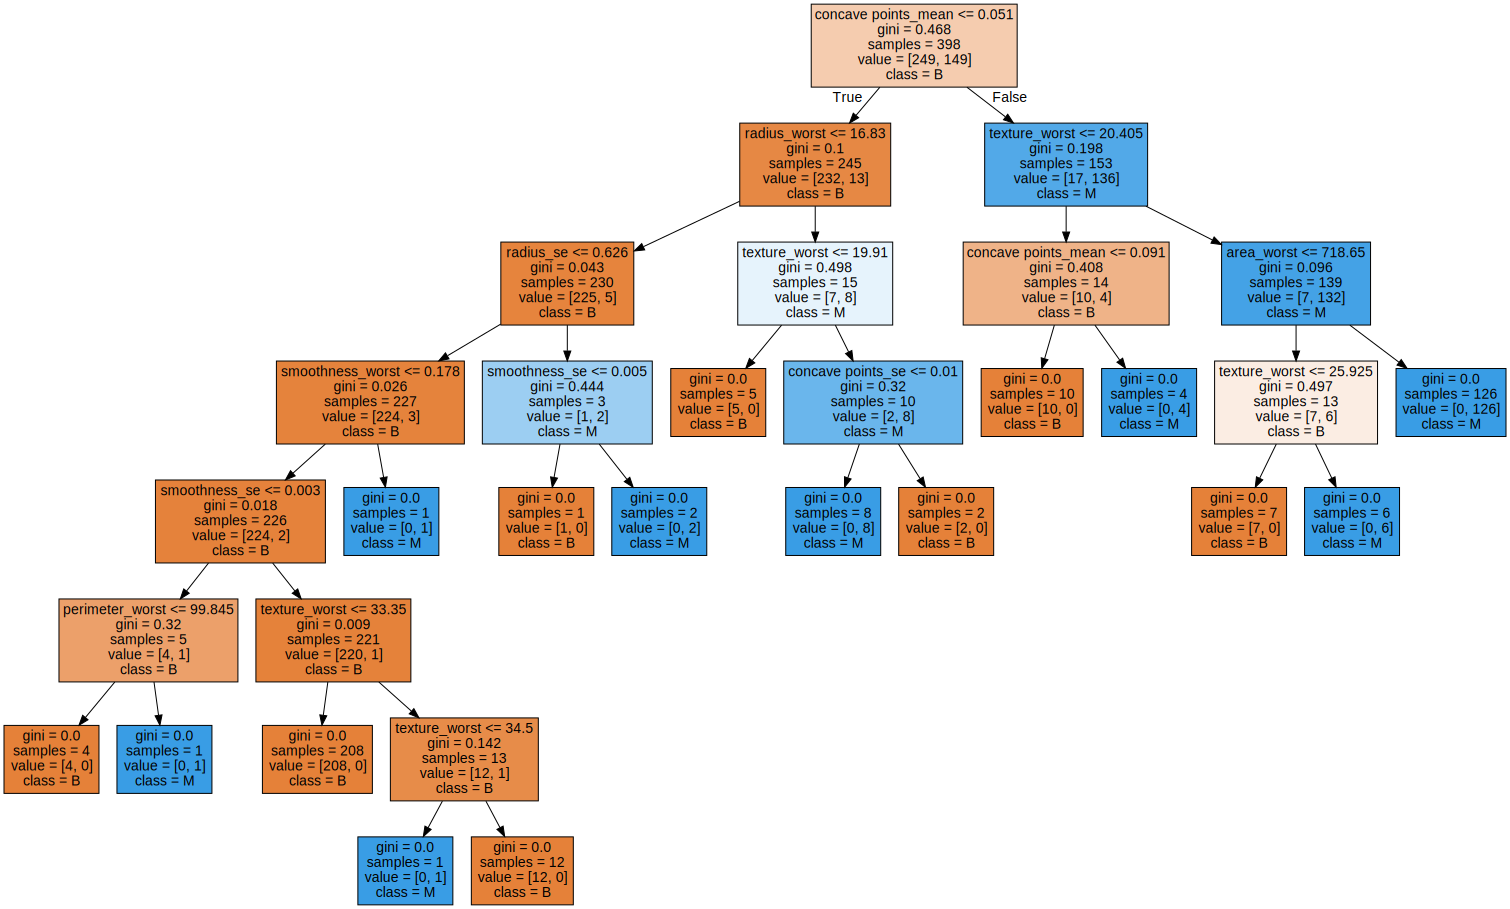

In [12]:
# c2 decision tree
c2_dot_data = tree.export_graphviz(c2_tree, out_file=None,
                                feature_names=X.columns,
                                class_names=['B', 'M'],
                                filled=True)

# Draw graph
graph = graphviz.Source(c2_dot_data, format="png")
graph

## c) Prune C1 and C2 by limiting the depth and compare their performance with the unpruned versions.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define a range of max_depth values to consider
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # You can adjust this range

# Create dictionaries of hyperparameters to search for entropy and gini
c1_tree_pruned_entropy = {
    'criterion': ['entropy'],
    'max_depth': max_depth_values,
    'random_state': [GLOBAL_RANDOM_STATE]
}

c2_tree_pruned_gini = {
    'criterion': ['gini'],
    'max_depth': max_depth_values,
    'random_state': [GLOBAL_RANDOM_STATE]
}

# Create decision tree classifiers
c1_tree_entropy = DecisionTreeClassifier()
c2_tree_gini = DecisionTreeClassifier()

# Perform grid search with cross-validation for entropy
grid_search_entropy = GridSearchCV(estimator=c1_tree_entropy, param_grid=c1_tree_pruned_entropy, cv=5, scoring='accuracy').fit(X_train, y_train)

# Perform grid search with cross-validation for gini
grid_search_gini = GridSearchCV(estimator=c2_tree_gini, param_grid=c2_tree_pruned_gini, cv=5, scoring='accuracy').fit(X_train, y_train)

# Get the best hyperparameters for entropy and gini
best_params_entropy = grid_search_entropy.best_params_
best_params_gini = grid_search_gini.best_params_

# Train pruned decision trees with the best hyperparameters for entropy and gini
best_tree_entropy = DecisionTreeClassifier(**best_params_entropy)
best_tree_entropy.fit(X_train, y_train)

best_tree_gini = DecisionTreeClassifier(**best_params_gini)
best_tree_gini.fit(X_train, y_train)

# Evaluate the pruned decision trees on the test set for entropy and gini
test_accuracy_entropy = best_tree_entropy.score(X_test, y_test)
test_accuracy_gini = best_tree_gini.score(X_test, y_test)

print('Best Decision Tree (Entropy) Performance: %.3f' % test_accuracy_entropy)
print('Best Decision Tree (Gini) Performance: %.3f' % test_accuracy_gini)

Best Decision Tree (Entropy) Performance: 0.965
Best Decision Tree (Gini) Performance: 0.965


When pruned tree's accuracies Entropy (0.965) and Gini (0.965) is compared with unpruned trees,
we can observe that **Decision Tree C2 model using Gini has improved its accuracy from 0.92 to 0.965** after pruning.
However Decision tree c1 model using entropy remains unchanged.

## d) Use depth 1,...,20 and plot the performance for C1 and C2 separately.

In [14]:
# define the range of depths from 1 to 20
depths = range(1, 21)

# lists to store accuracies of both c1 and c2
c1_scores = []
c2_scores = []

# loop through each depth value
for depth in depths:
    # train c1 and c2 with current depth value
    c1_tree_ = DecisionTreeClassifier(random_state=GLOBAL_RANDOM_STATE, criterion='entropy', max_depth=depth).fit(X_train, y_train)
    c2_tree_ = DecisionTreeClassifier(random_state=GLOBAL_RANDOM_STATE, criterion='gini', max_depth=depth).fit(X_train, y_train)

    # store the accuracy into corresponding lists
    c1_scores.append(c1_tree_.score(X_test, y_test))
    c2_scores.append(c2_tree_.score(X_test, y_test))

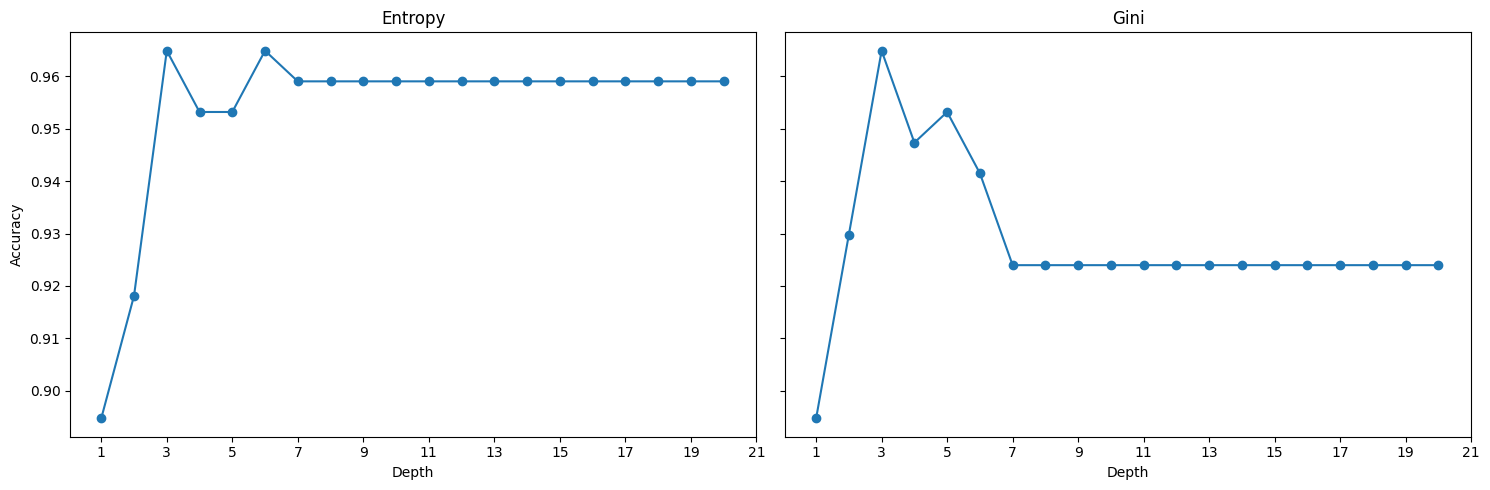

In [15]:
# define 2 suplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# plot the accuracies of c1 decision tree
ax1.plot(depths, c1_scores, marker='o')
ax1.xaxis.set_ticks(np.arange(1, 22, 2))
ax1.set_xlabel('Depth')
ax1.set_ylabel('Accuracy')
ax1.set_title('Entropy')

# plot the accuracies of c2 decision tree
ax2.plot(depths, c2_scores, marker='o')
ax2.xaxis.set_ticks(np.arange(1, 22, 2))
ax2.set_xlabel('Depth')
ax2.set_title('Gini')


fig.tight_layout()
plt.show()

- For Decision tree with Entropy, **depth = 3** or 6 has the highest performance of 0.965, and for **depth>6** the performance remains the same.
- For Decision tree with Gini, **depth = 3** has the highest performance of 0.965, and for **depth >6** the performance remains the same.
- Both Gini and Entropy are performing the same

## e) Choose the best value for depth and visualize C1 and C2.

In [16]:
#From the previous question, we see that the best depth for both C1 and C2 is 3.

# c1 decision tree with best depth of 3
c1_tree_best = DecisionTreeClassifier(random_state=GLOBAL_RANDOM_STATE, criterion='entropy', max_depth=3).fit(X_train, y_train)
# c2 decision tree with best depth of 3
c2_tree_best = DecisionTreeClassifier(random_state=GLOBAL_RANDOM_STATE, criterion='gini', max_depth=3).fit(X_train, y_train)

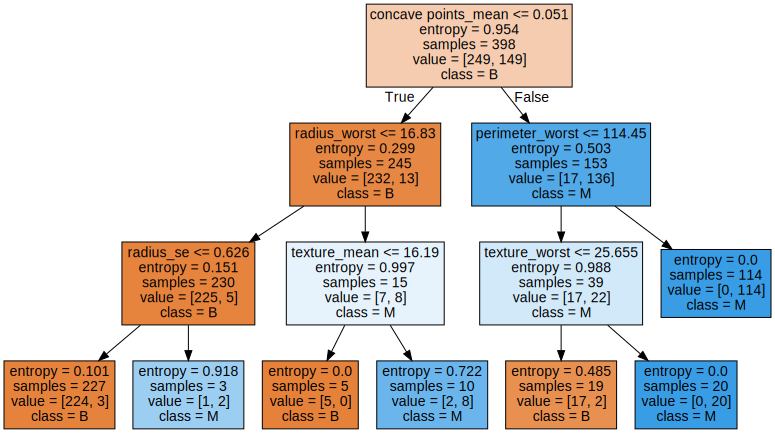

In [17]:
# best c1 decision tree
c1_dot_data = tree.export_graphviz(c1_tree_best, out_file=None,
                                feature_names=X.columns,
                                class_names=['B', 'M'],
                                filled=True)

# Draw graph
graph = graphviz.Source(c1_dot_data, format="png")
graph

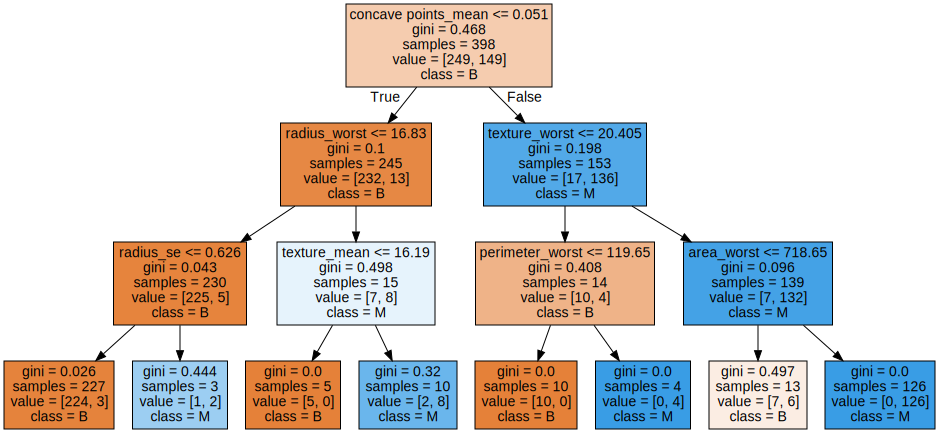

In [18]:
# best c2 decision tree
c2_dot_data = tree.export_graphviz(c2_tree_best, out_file=None,
                                feature_names=X.columns,
                                class_names=['B', 'M'],
                                filled=True)

# Draw graph
graph = graphviz.Source(c2_dot_data, format="png")
graph

# Random Forest
# 2. Use “from sklearn.ensemble import RandomForestClassifier”

## a) Train an RF classifier with 10 estimators and compare the performance for the test set with C1.

In [19]:
from sklearn.ensemble import RandomForestClassifier
import time

rf_tree = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=GLOBAL_RANDOM_STATE ).fit(X_train, y_train.values.ravel())

y_pred_rf_entropy = rf_tree.predict(X_test)
print("Results of Random Forest classifier(entropy): ")
print("Confusion Matrix:\n ",
    confusion_matrix(y_test, y_pred_rf_entropy))

print ("Accuracy : ",
accuracy_score(y_test,y_pred_rf_entropy)*100)

print("Report :\n ",
classification_report(y_test, y_pred_rf_entropy))

print("Results of decision tree classifier(entropy) \n ")
print("Confusion Matrix:\n ",
confusion_matrix(y_test, y_pred_c1_entropy))

print ("Accuracy : ",
accuracy_score(y_test,y_pred_c1_entropy)*100)

print("Report :\n ",
classification_report(y_test, y_pred_c1_entropy))

Results of Random Forest classifier(entropy): 
Confusion Matrix:
  [[107   1]
 [  5  58]]
Accuracy :  96.49122807017544
Report :
                precision    recall  f1-score   support

           B       0.96      0.99      0.97       108
           M       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

Results of decision tree classifier(entropy) 
 
Confusion Matrix:
  [[106   2]
 [  5  58]]
Accuracy :  95.90643274853801
Report :
                precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



Here is the Comparative analysis:

1. **Accuracy:**
 - The Random Forest with entropy achieved a higher accuracy of **96.5%** compared to the Decision Tree with entropy, which had an accuracy of **95.9%**. This indicates that the Random Forest model has a slightly better overall classification performance.

2. **Precision:**
 - Precision for both models is quite **high** for both classes (B and M). The Random Forest has a precision of 0.96 for class B and 1 for class M, while the Decision Tree has a precision of 0.95 for class B and 0.97 for class M. This suggests that both models are good at correctly identifying their respective classes.

3. **Recall:**
 - The Random Forest has a slightly **higher recall** for class B (benign) and M (malignant) compared to the Decision Tree.

4. **F1-Score:**
 - The F1-scores are also quite high for both models.

5. **Confusion Matrix:**
 - The confusion matrices show that Random forest has comparatively lesser number of false positives and false negatives.

In summary, the Random Forest model with entropy as the criterion **appears to perform slightly better** than the Decision Tree model with entropy.

Also, the reason for adding criterion - 'Entropy' is because we were comparing RF with decision tree of C1 that has criterion 'Entropy'. Hence, it is only fair to compare both the models trained similarly.


## b) Change the number of estimators from 10,50,100,500, 1000, and plot the performance.

In [28]:
# define the range of estimators
estimators = [10,50,100,500,1000]

# lists to store accuracies of c1
rf_scores = []

# loop through each estimator value
for estimator in estimators:
    # train c1 with current estimator value
    rf_tree_ = RandomForestClassifier(n_estimators=estimator,criterion='entropy',random_state=GLOBAL_RANDOM_STATE).fit(X_train, y_train.values.ravel())

    # store the accuracy into corresponding lists
    rf_scores.append(rf_tree_.score(X_test, y_test))

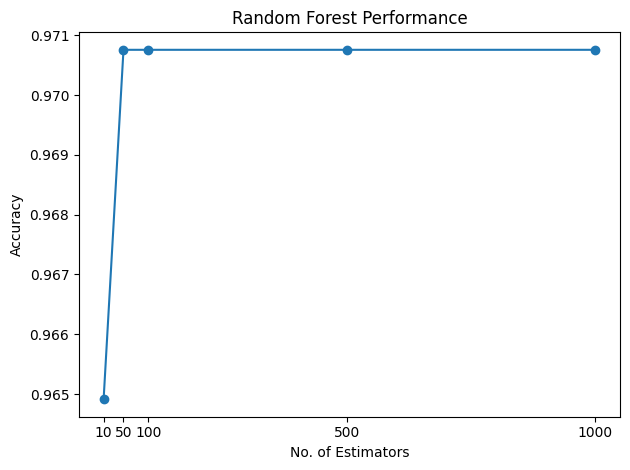

In [29]:
# define suplot
fig, (ax) = plt.subplots()

# plot the accuracies of c1 Random Forest tree
ax.plot(estimators, rf_scores, marker='o')
ax.xaxis.set_ticks([10,50,100,500,1000])
ax.set_xlabel('No. of Estimators')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Performance')

fig.tight_layout()
plt.show()

For estimators **<=10** the accuracy moves around ** 0.965**. Whereas the n_estimators >10 show the highest performance of **0.9708**

The reason for adding 'entropy' as a criterion is because when we train only with default criterion i.e. 'Gini', the accuracy falls drastically after 100 estimators which is why entropy is preffered.

## c) Perform 5 fold cross-validation and report the performance for RF classifier with 50 estimators



In [32]:
from sklearn.model_selection import cross_val_score

score_rf=cross_val_score(RandomForestClassifier(n_estimators=50, random_state=GLOBAL_RANDOM_STATE),X_train, y_train.values.ravel())
print(score_rf)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score_rf.mean(), score_rf.std()))

[0.9625     0.95       0.975      0.96202532 0.93670886]
0.96 accuracy with a standard deviation of 0.01


- Random Forest with 50 estimators performed well with cross validation  of **0.96** which is similar to the accuracy on the test dataset.

The reason for not adding any criterion here is that, we arent comparing RF with any models and also default criterion is giving better results.

## d) Plot the feature importance for RF with 200 estimators using the mean decrease in impurity and also feature permutation and explain the plots.

### Mean decrease impurity

In [33]:
#Define Random forest with 200 estimators
rf_tree = RandomForestClassifier(random_state=GLOBAL_RANDOM_STATE, n_estimators=200).fit(X_train, y_train.values.ravel())

In [34]:
rf_tree.feature_importances_

array([0.02449628, 0.01691734, 0.05375311, 0.03265443, 0.00665206,
       0.00703715, 0.06977811, 0.11677705, 0.00299883, 0.00480924,
       0.01731677, 0.00455585, 0.01232931, 0.03209361, 0.00522539,
       0.00362822, 0.00470403, 0.00658671, 0.00531923, 0.00626209,
       0.1004005 , 0.01881374, 0.11058738, 0.09542553, 0.01150328,
       0.01402526, 0.04481863, 0.1523502 , 0.01262464, 0.00555602])

Text(0.5, 1.0, 'Random Forest Feature Importance (MDI)')

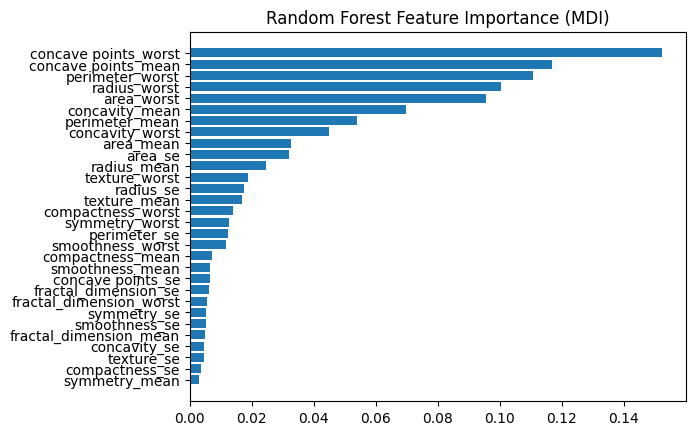

In [35]:
sorted_idx = rf_tree.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf_tree.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance (MDI)")

### Feature Permutation

In [ ]:
perm_importance = permutation_importance(rf_tree, X_test, y_test,n_repeats=10, n_jobs=2, random_state=GLOBAL_RANDOM_STATE)

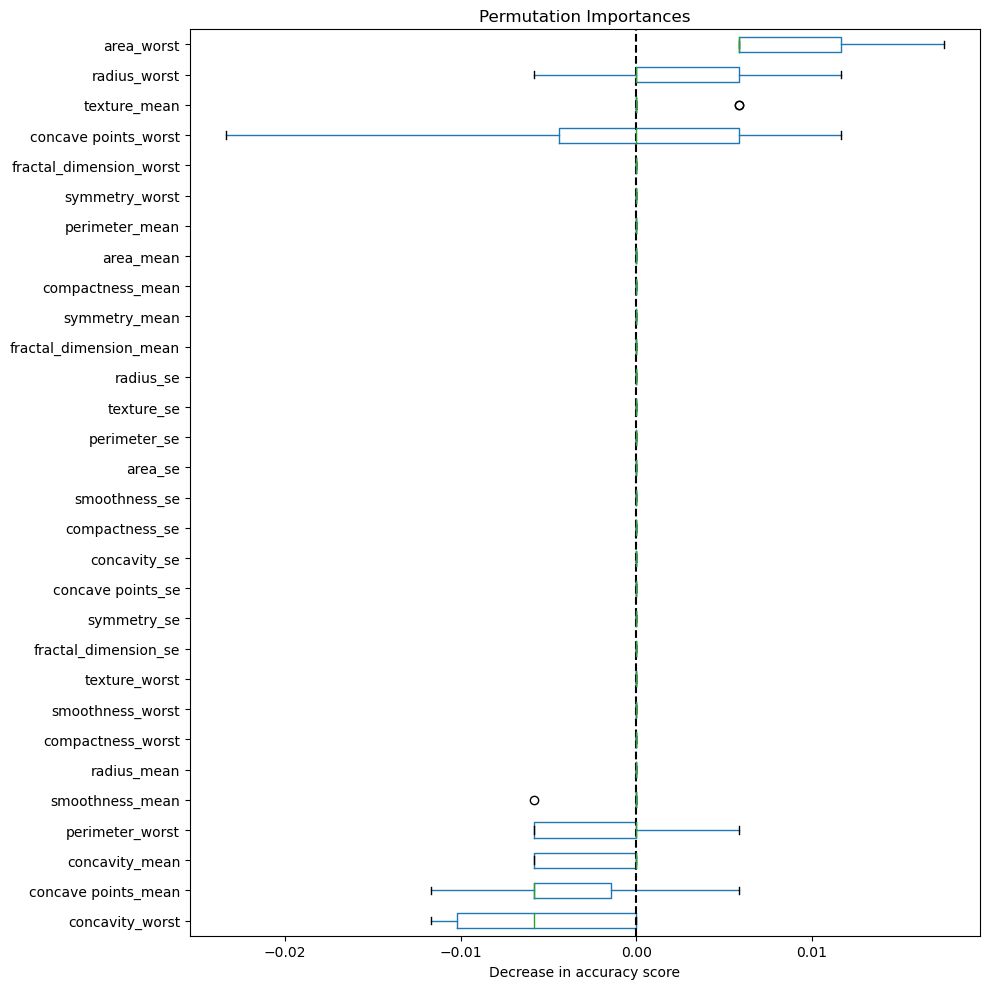

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()

importances = pd.DataFrame(
    perm_importance.importances[sorted_idx].T,
    columns=X.columns[sorted_idx],
)
ax = importances.plot.box(vert=False, whis=10, figsize=(10, 10))
ax.set_title("Permutation Importances")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()



- Both these plots shows the feature importances.
- According to MDI (mean decrease in accuracy), the best features are **concave points_worst, concave points_mean, perimeter_worst**
- While according to Permutation importance, the best features are **radius_worst, area_worst, concave points_worst**
- MDI importances are computed on training set statistics and therefore do not reflect the ability of feature to be useful to make predictions that generalize to the test set. While Permutation importance are calculated using testing dataset and provides better insights about the features.

# AdaBoost Classifier
# 3. Use “from sklearn.ensemble import AdaBoostClassifier”

## a) Train a classifier with 10 estimators and compare the performance with C1 and RF in 2a.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab_tree = AdaBoostClassifier(random_state=GLOBAL_RANDOM_STATE, n_estimators=10).fit(X_train, y_train.values.ravel())

y_pred_ab = ab_tree.predict(X_test)
print("Results for ada boost classifier:")
print("Confusion Matrix:\n ",
confusion_matrix(y_test, y_pred_ab))

print ("Accuracy : ",
accuracy_score(y_test,y_pred_ab)*100)

print("Report : \n ",
classification_report(y_test, y_pred_ab))

print("Results of random forest classifier(entropy): ")
print("Confusion Matrix:\n ",
    confusion_matrix(y_test, y_pred_rf_entropy))

print ("Accuracy : ",
accuracy_score(y_test,y_pred_rf_entropy)*100)

print("Report :\n ",
classification_report(y_test, y_pred_rf_entropy))

print("Results of decision tree classifier(entropy): ")
print("Confusion Matrix:\n ",
confusion_matrix(y_test, y_pred_c1_entropy))

print ("Accuracy : ",
accuracy_score(y_test,y_pred_c1_entropy)*100)

print("Report :\n ",
classification_report(y_test, y_pred_c1_entropy))

Results for ada boost classifier:
Confusion Matrix:
  [[106   2]
 [  3  60]]
Accuracy :  97.07602339181285
Report : 
                precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Results of random forest classifier(entropy): 
Confusion Matrix:
  [[107   1]
 [  5  58]]
Accuracy :  96.49122807017544
Report :
                precision    recall  f1-score   support

           B       0.96      0.99      0.97       108
           M       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

Results of decision tree classifier(entropy): 
Confusion Matrix:
  [[106   2]
 [  5  58]]
Accura

AdaBoost performed the best at **97.07** than both Random forest **96.49** and C1 Decision Tree **95.9**  

## b) Change the number of estimators from 10,50,100,500, 1000, and plot the performance.

In [ ]:
# define the range of estimators
estimators = [10,50,100,500,1000]

# lists to store accuracies of ab
ab_scores = []

# loop through each estimator value
for estimator in estimators:
    # train ab with current estimator value
    ab_tree_ = AdaBoostClassifier(random_state=GLOBAL_RANDOM_STATE, n_estimators=estimator).fit(X_train, y_train.values.ravel())

    # store the accuracy into corresponding lists
    ab_scores.append(ab_tree_.score(X_test, y_test))

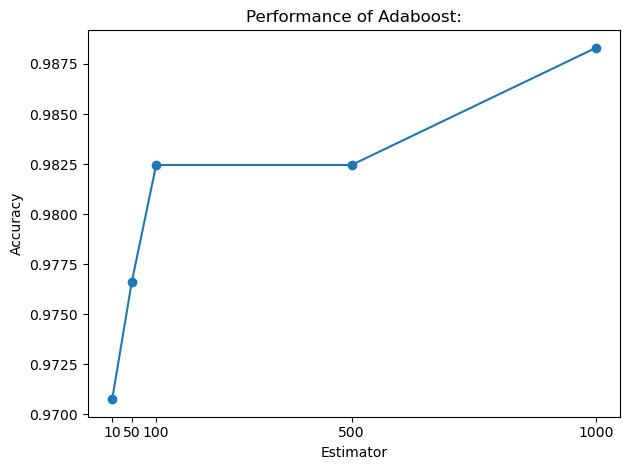

In [ ]:
# define suplot
fig, (ax) = plt.subplots()

# plot the accuracies of c1 Random Forest tree
ax.plot(estimators, ab_scores, marker='o')
ax.xaxis.set_ticks([10,50,100,500,1000])
ax.set_xlabel('Estimator')
ax.set_ylabel('Accuracy')
ax.set_title('Performance of Adaboost:')

fig.tight_layout()
plt.show()

For n_estimators =1000 the model performed the best with accuracy of 0.9875 (The highest till now).

## c) Perform 5 fold cross-validation and report the performance for classifier with 50 estimators

In [ ]:
from sklearn.model_selection import cross_val_score

score_ab=cross_val_score(AdaBoostClassifier(random_state=GLOBAL_RANDOM_STATE, n_estimators=50),X_train, y_train.values.ravel())
print(score_ab)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score_ab.mean(), score_ab.std()))

[0.975      0.95       0.975      0.97468354 0.93670886]
0.96 accuracy with a standard deviation of 0.02


- AdaBoost with 50 estimators performed well with cross validation mean accuracy of **0.96**

# Gaussian NB
# 4. Use “from sklearn.naive_bayes import GaussianNB”
## a) Train a classifier and compare the performance for the test set with C1 and 2a and 3a.

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_tree = GaussianNB().fit(X_train, y_train.values.ravel())

y_pred_nb = nb_tree.predict(X_test)

print("Results for Gaussian NB classifier:")

print("Confusion Matrix:\n ",
confusion_matrix(y_test, y_pred_nb))

print ("Accuracy : ",
accuracy_score(y_test,y_pred_nb)*100)

print("Report : ",
classification_report(y_test, y_pred_nb))

Results for Gaussian NB classifier:
Confusion Matrix:
  [[104   4]
 [  6  57]]
Accuracy :  94.15204678362574
Report :                precision    recall  f1-score   support

           B       0.95      0.96      0.95       108
           M       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



Naive Bayes performed the least at **95.15%** accuracy when compared to
AdaBoost @ 97.07%
Random Forest @ 96.49%
C1 Decision Tree @ 95.9%

# PCA
## 5a) Use PCA and print the Cumulative proportion. Using Cumulative proportion, only keep the features that account for more than 95% (ratio of variance to keep) of the total variation associated with all the original variables.

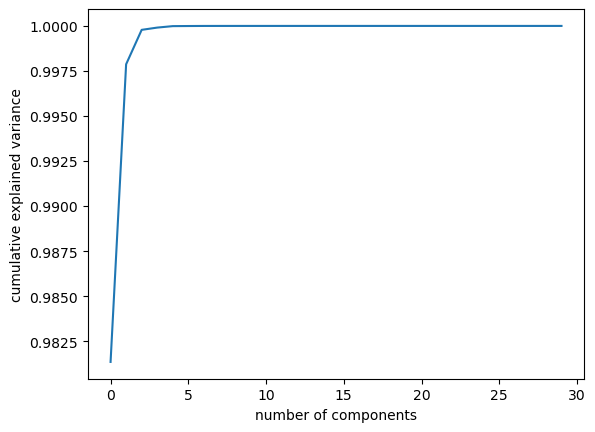

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca_95 = PCA(n_components=0.95).fit(X_train)

X_train_pca = pca_95.transform(X_train)
X_test_pca = pca_95.transform(X_test)

## b) Train an RF classifier with 100 estimators using the dataset with reduced features and compare the performance with RF with 100 estimators using all the features.

In [ ]:
t0 = time.time()
rf_tree_pca = RandomForestClassifier(n_estimators=100, criterion='entropy').fit(X_train_pca, y_train.values.ravel())
print("Training time:", time.time()-t0)

y_pred_rf_entropy_pca = rf_tree_pca.predict(X_test_pca)
print("Results of random forest classifier with reduced features: ")

print ("Accuracy : ",
accuracy_score(y_test,y_pred_rf_entropy_pca)*100)


t0 = time.time()
rf_tree = RandomForestClassifier(n_estimators=100, criterion='entropy').fit(X_train, y_train.values.ravel())
print("Training time:", time.time()-t0)
y_pred_rf_entropy_100 = rf_tree.predict(X_test)

print("Results of random forest classifier with all features): ")

print ("Accuracy : ",
accuracy_score(y_test,y_pred_rf_entropy_100)*100)




Training time: 0.1618340015411377
Results of random forest classifier with reduced features: 
Accuracy :  86.54970760233918
Training time: 0.20395493507385254
Results of random forest classifier with all features): 
Accuracy :  97.07602339181285


As you can observe, Random Forest Classifier with PCA reduced features achieves **86.54** accuracy which is lesser than
Random forest using all features at **97.07%**.

But with only reduced features we could train upto 86.54%

References:
 1. https://www.geeksforgeeks.org/decision-tree/
 2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
 3. https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/
 4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
 5. https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=The%20feature%20importance%20(variable%20importance,by%20employing%20the%20feature%20selection
 6. www.chat.openai.com